<a href="https://colab.research.google.com/github/younghun-cha/Healthcare-Big-Data-Engineer/blob/main/AI/04-Deep_Learning_CNNs/02_CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch: CNN Basic

In [3]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


## 1. Data Loading
- `torchvision`에서 CIFAR10 데이터셋 다운로드

In [4]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="../dataset/cifa10/train/",
                     train=True, 
                     download=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12922136.08it/s]


Extracting ../dataset/cifa10/train/cifar-10-python.tar.gz to ../dataset/cifa10/train/


In [5]:
print(train_data.data.shape) 
print(train_data.targets[:10])
print(train_data.classes)
print(train_data.class_to_idx)

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [6]:
data, label = train_data[0]

print(type(data))
print(data)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD5D790A290>


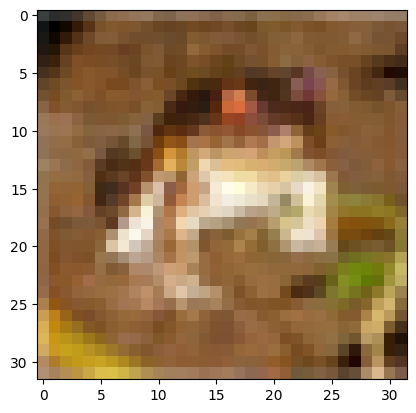

In [7]:
import matplotlib.pyplot as plt

plt.imshow(data)

In [8]:
print(type(label))
print(label)
print(train_data.classes[label])

<class 'int'>
6
frog


In [9]:
test_data = CIFAR10(root="../dataset/cifa10/test/", 
                    train=False, 
                    download=True)

print(test_data)
print(test_data.data.shape)

100%|██████████| 170498071/170498071 [00:17<00:00, 9572989.72it/s] 


Extracting ../dataset/cifa10/test/cifar-10-python.tar.gz to ../dataset/cifa10/test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../dataset/cifa10/test/
    Split: Test
(10000, 32, 32, 3)


## 2. Data Transforms

### 2-1. Trainset Transforms
- Data Augmentation 포함

In [10]:
from torchvision import transforms

train_transforms = transforms.Compose([
          transforms.RandomCrop(32, padding=4),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize(
              (0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="../dataset/cifa10/train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

Files already downloaded and verified


In [11]:
print(train_data)
print(train_data.transforms)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../dataset/cifa10/train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [12]:
data, label = train_data[0]

print(type(data))
print(data.size())
print(data)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291,  0.4399,  ..., -0.5293, -1.1109, -1.4598],
         ...,
         [-2.4291, -2.4291, -1.0527,  ...,  0.1104,  0.4981,  0.8276],
         [-2.4291, -2.4291, -1.7894,  ...,  0.5950,  0.9051,  1.1765],
         [-2.4291, -2.4291, -1.4017,  ...,  1.1184,  1.2735,  1.4091]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183,  0.0204,  ..., -0.9826, -1.3562, -1.4742],
         ...,
         [-2.4183, -2.4183, -1.4742,  ..., -0.6876, -0.2352, -0.0189],
         [-2.4183, -2.4183, -2.0446,  ..., -0.0582,  0.3154,  0.4924],
         [-2.4183, -2.4183, -1.7496,  ...,  0.4531,  0.6694,  0.7481]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214]

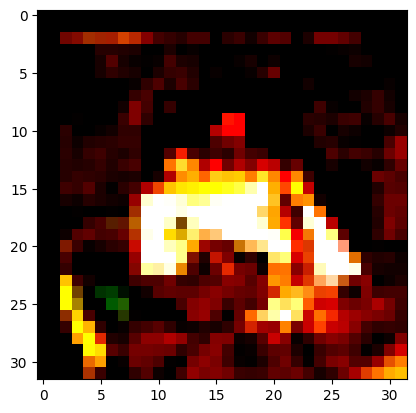

In [13]:
plt.imshow(data.permute(1, 2, 0))

### 2-2. Testset Transforms

In [14]:
test_transforms = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(
              (0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10(
      root="../dataset/cifa10/test/", 
      train=False, 
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../dataset/cifa10/test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


## 3. Data Batching with `DataLoader`

In [15]:
trainloader = torch.utils.data.DataLoader(
                    train_data, 
                    batch_size=64, 
                    shuffle=True)

In [16]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())

print(labels_batch.size())

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [17]:
testloader = torch.utils.data.DataLoader(
                    test_data, 
                    batch_size=64, 
                    shuffle=False)

## 4. Model Design



### 4-1. Pre-trained models: VGG16

In [18]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:01<00:00, 299MB/s]


In [19]:
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


### 4-2. PyTorch NN Module (torch.nn)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,2)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [21]:
simplenet = SimpleNet()
print(simplenet)

input = torch.rand(2048)
output = simplenet(input)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


### 4-3: `NeNet5` Style

In [22]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

## 5. Fundamental Training Loop

In [23]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), # <1>
                      lr=0.001, 
                      momentum=0.9)

In [24]:
N_EPOCHS = 10 
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))

Epoch: 0 Loss: 2.2126783298714385
Epoch: 1 Loss: 1.9155704205298363
Epoch: 2 Loss: 1.7449816149823807
Epoch: 3 Loss: 1.6485155253764003
Epoch: 4 Loss: 1.5788683469033302
Epoch: 5 Loss: 1.5251636832876279
Epoch: 6 Loss: 1.4751442501612027
Epoch: 7 Loss: 1.4342470870298498
Epoch: 8 Loss: 1.4049953496669565
Epoch: 9 Loss: 1.3753911189715882


## 6. Train with Validation set 

### 6-1. Splitting Train/Validation Datasets

In [25]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      train_data, 
                      [40000, 10000])

trainloader = torch.utils.data.DataLoader(
                    train_set, 
                    batch_size=16, 
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set, 
                    batch_size=16, 
                    shuffle=True)

print(len(trainloader))
print(len(valloader))

2500
625


### 6-2. Training Loop with Validation

In [26]:
from torch import optim
from torch import nn

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr=0.001, 
                      momentum=0.9)

In [27]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):

    # Training 
    train_loss = 0.0
    model.train() # <1>
    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    val_loss = 0.0
    model.eval() # <2>
    for inputs, labels in valloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

    print("Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch, 
                  train_loss/len(trainloader), 
                  val_loss/len(valloader)))

Epoch: 0 Train Loss: 1.9846339773654937 Val Loss: 1.737335072517395
Epoch: 1 Train Loss: 1.6717952834129333 Val Loss: 1.6004587377548218
Epoch: 2 Train Loss: 1.5527841733455658 Val Loss: 1.4859876925468445
Epoch: 3 Train Loss: 1.4659450975894928 Val Loss: 1.4209067801475526
Epoch: 4 Train Loss: 1.407873698759079 Val Loss: 1.3934617197990418
Epoch: 5 Train Loss: 1.3696583562850952 Val Loss: 1.3701095726966859
Epoch: 6 Train Loss: 1.3224613290548324 Val Loss: 1.3047871487617493
Epoch: 7 Train Loss: 1.2886700919151306 Val Loss: 1.2706647946834564
Epoch: 8 Train Loss: 1.2569164001703261 Val Loss: 1.276824865627289
Epoch: 9 Train Loss: 1.2259757262706756 Val Loss: 1.2252483823776246


### 6-3. Metrics with Testset

In [28]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
    model.eval()
    y_test_batch = y_test_batch.to(device)
    x_test_batch = x_test_batch.to(device)
    
    y_pred_batch = model(x_test_batch)
    _, predicted = torch.max(y_pred_batch, 1)
    num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size) 

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

157 64
Test Accuracy: 0.5922572016716003


## 8. Model Save & Load

In [30]:
torch.save(model.state_dict(), "./models/lenet5_model.pt")

In [31]:
model = LeNet5().to(device)
model.load_state_dict(torch.load("./models/lenet5_model.pt"))

<All keys matched successfully>